## **Uber Data Analysis🚗📊**

In [1]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
from matplotlib import cm #Colormap

In [10]:
df_aprl14 = pd.read_csv('/content/uber-raw-data-apr14.csv')
df_may14 = pd.read_csv('/content/uber-raw-data-may14.csv')
df_jun14 = pd.read_csv('/content/uber-raw-data-jun14.csv')
df_jul14 = pd.read_csv('/content/uber-raw-data-jul14.csv')
df_sep14 = pd.read_csv('/content/uber-raw-data-sep14.csv')

In [12]:
df_aug14 = pd.read_csv('/content/uber-raw-data-aug14.csv')

In [13]:
#Merge the dataframes into one
df = pd.concat([df_aprl14, df_may14, df_jun14, df_jul14, df_aug14, df_sep14], ignore_index=True)

In [14]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [16]:
# Renaming the Date/Time Column
df = df.rename(columns={'Date/Time': 'Date_time'})

# Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

# Adding useful columns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [18]:
print(df.head())

            Date_time      Lat      Lon    Base  Month  Weekday  Day  Hour  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  April  Tuesday    1     0   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  April  Tuesday    1     0   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  April  Tuesday    1     0   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  April  Tuesday    1     0   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  April  Tuesday    1     0   

   Minute  
0      11  
1      17  
2      21  
3      28  
4      33  


In [19]:
print(df.tail())

                  Date_time      Lat      Lon    Base      Month  Weekday  \
4534322 2014-09-30 22:57:00  40.7668 -73.9845  B02764  September  Tuesday   
4534323 2014-09-30 22:57:00  40.6911 -74.1773  B02764  September  Tuesday   
4534324 2014-09-30 22:58:00  40.8519 -73.9319  B02764  September  Tuesday   
4534325 2014-09-30 22:58:00  40.7081 -74.0066  B02764  September  Tuesday   
4534326 2014-09-30 22:58:00  40.7140 -73.9496  B02764  September  Tuesday   

         Day  Hour  Minute  
4534322   30    22      57  
4534323   30    22      57  
4534324   30    22      58  
4534325   30    22      58  
4534326   30    22      58  


In [20]:
print(df.shape)

(4534327, 9)


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int32         
 7   Hour       int32         
 8   Minute     int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(3)
memory usage: 259.5+ MB
None


In [22]:
print(df.describe())

                           Date_time           Lat           Lon  \
count                        4534327  4.534327e+06  4.534327e+06   
mean   2014-07-11 18:50:50.578151424  4.073926e+01 -7.397302e+01   
min              2014-04-01 00:00:00  3.965690e+01 -7.492900e+01   
25%              2014-05-28 15:18:00  4.072110e+01 -7.399650e+01   
50%              2014-07-17 14:45:00  4.074220e+01 -7.398340e+01   
75%              2014-08-27 21:55:00  4.076100e+01 -7.396530e+01   
max              2014-09-30 22:59:00  4.211660e+01 -7.206660e+01   
std                              NaN  3.994991e-02  5.726670e-02   

                Day          Hour        Minute  
count  4.534327e+06  4.534327e+06  4.534327e+06  
mean   1.594337e+01  1.421831e+01  2.940071e+01  
min    1.000000e+00  0.000000e+00  0.000000e+00  
25%    9.000000e+00  1.000000e+01  1.400000e+01  
50%    1.600000e+01  1.500000e+01  2.900000e+01  
75%    2.300000e+01  1.900000e+01  4.400000e+01  
max    3.100000e+01  2.300000e+01  5.

In [28]:
#Grouping by Hour
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index)

df_hour.head()

,Number_of_trips
Hour,
0,103836
1,67227
2,45865
3,48287
4,55230


Plotting the result

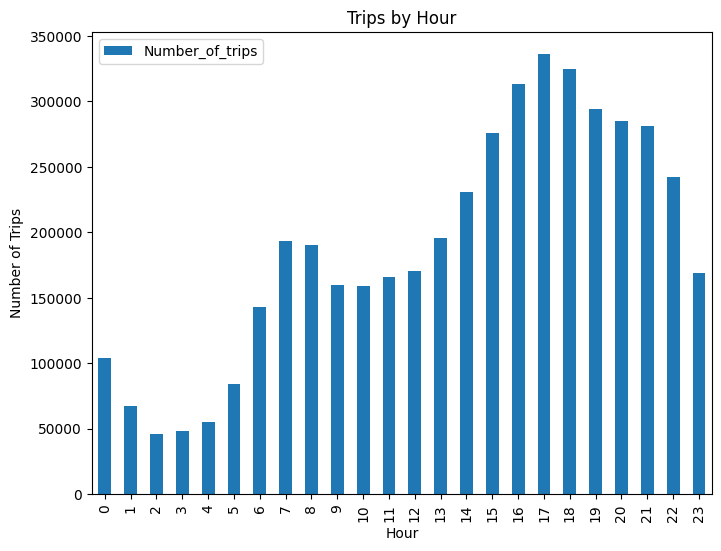

In [30]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

Analysing the Result

In [31]:
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] ==max_Number_of_trips_hour ].index[0]

In [33]:
print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'
.format(max_Number_of_trips_hour, max_hour))

The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


In [34]:
#Grouping by Month
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index)

df_month

,Number_of_trips
Month,
April,564516
May,652435
June,663844
July,796121
August,829275
September,1028136


Plotting the Result

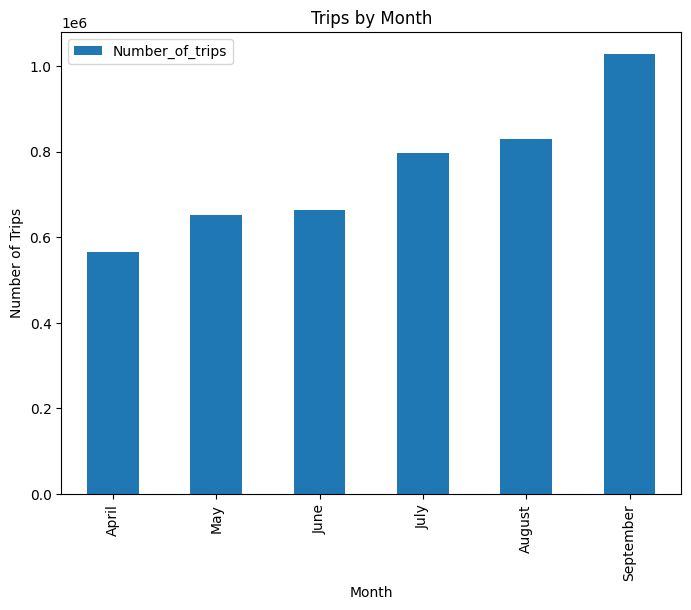

In [35]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

Analysing the Result

In [36]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))

The ratio of the increase from August to September is 24 %.


In [37]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index)

df_weekday

,Number_of_trips
Weekday,
Tuesday,663789
Wednesday,696488
Thursday,755145
Friday,741139
Saturday,646114
Sunday,490180
Monday,541472


Plotting the Result

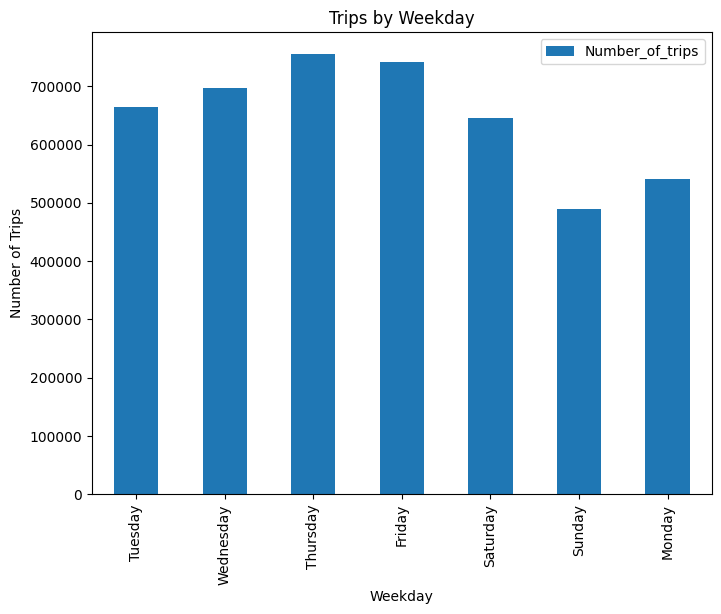

In [38]:
df_weekday.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

Analysing the Result

In [39]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))

The lowest number of trips by weekday is 490180 trip, that corresponds to Sunday.


In [40]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The avg number of trips during working days is {}% higher than the avg number of trips during weekends.'.format(ratio_weekday))

The avg number of trips during working days is 19.6% higher than the avg number of trips during weekends.


In [41]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index)

df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [42]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

,Hour,Month,Number_of_trips
0,0,April,11910
1,0,August,21451
2,0,July,17953
3,0,June,14514
4,0,May,13875


In [43]:
##We create a Numpy array that includes the Number of trips data then reshape it to fit our
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [44]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

,April,May,June,July,August,September
0,11910,21451,17953,14514,13875,24133
1,7769,14471,11527,9167,8186,16107
2,4935,10105,8562,6189,5372,10702
3,5040,10376,9199,6937,5946,10789
4,6095,11774,10040,7701,6945,12675


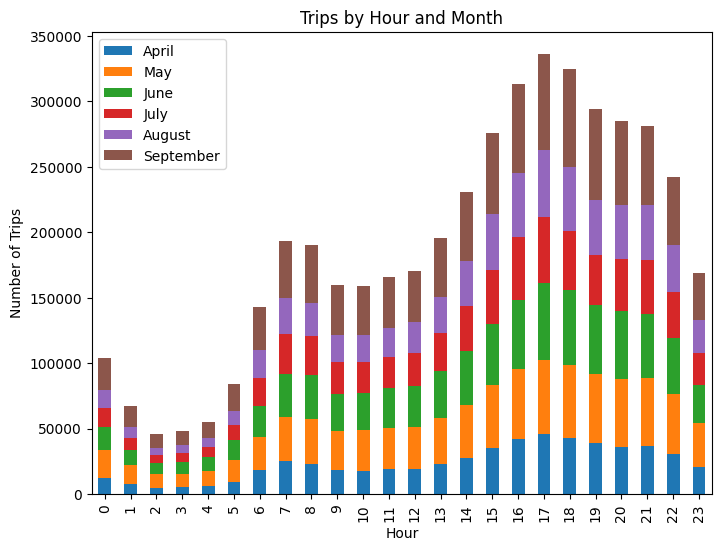

In [45]:
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

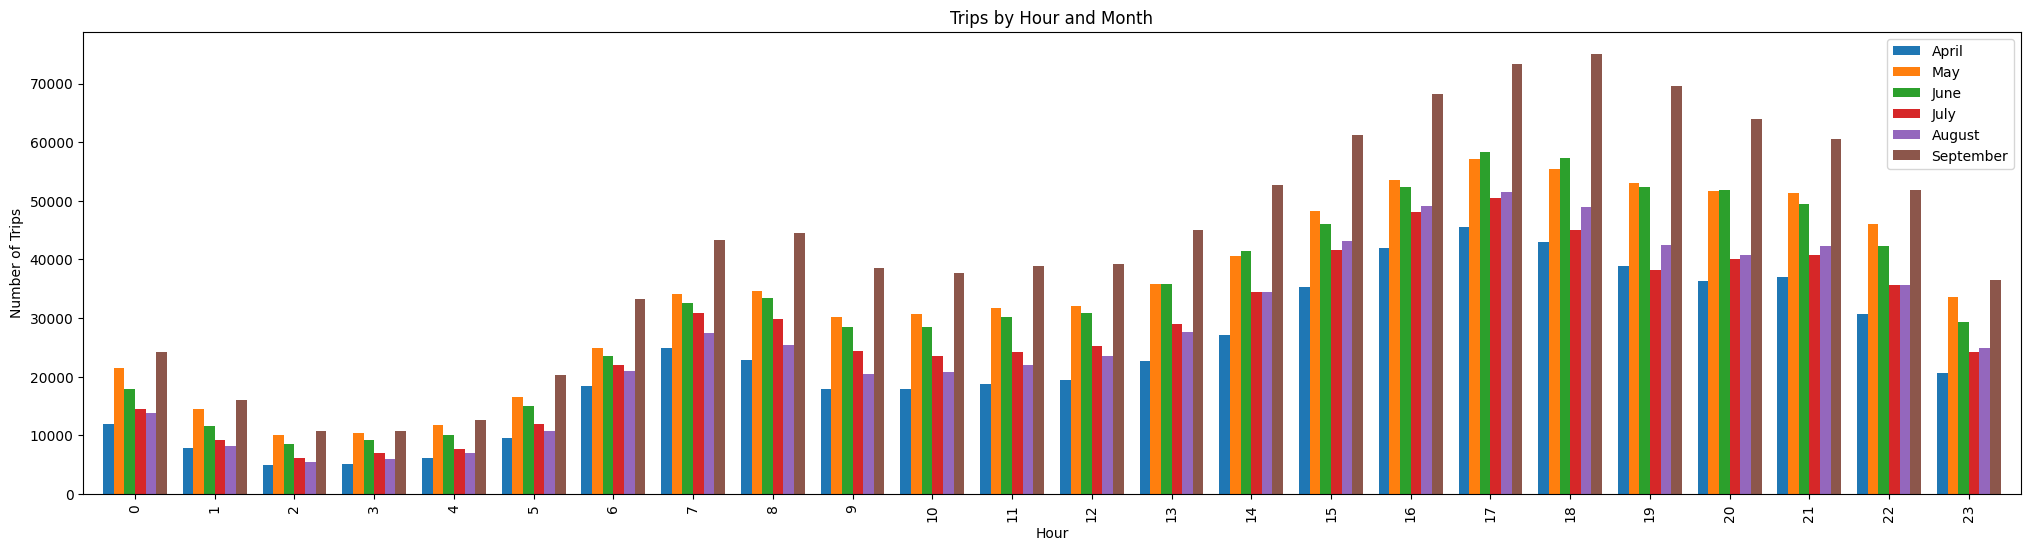

In [46]:
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


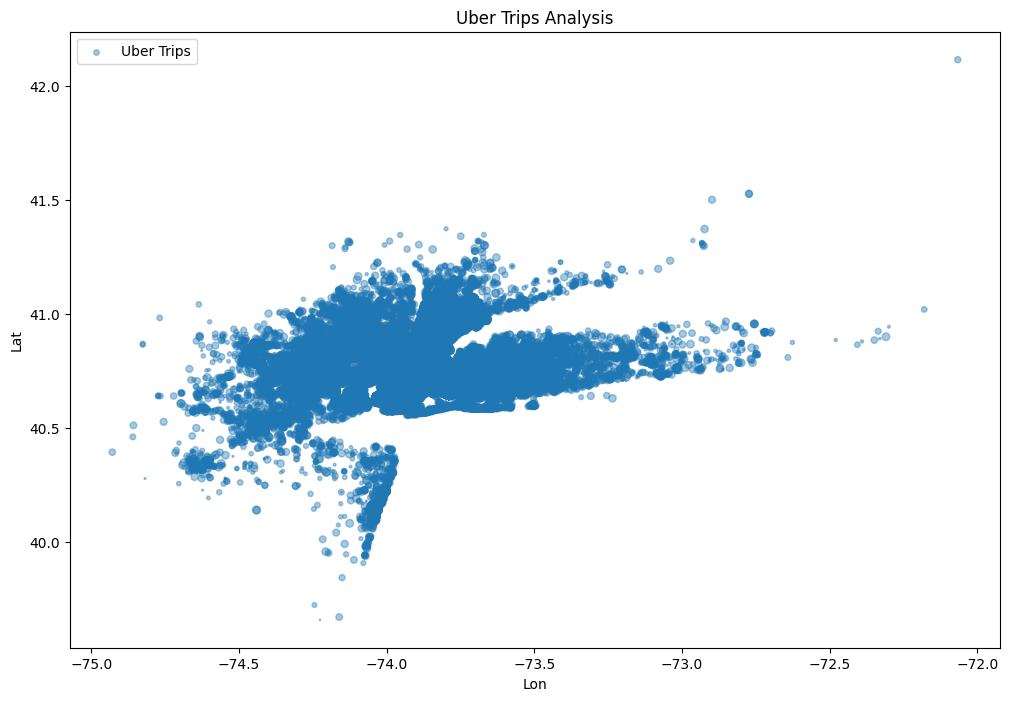

In [47]:

df.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=df['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

## **Summary**

So this is how we can analyze the Uber trips for New York City. Some of the conclusions that I got from this analysis are:

Monday is the most profitable day for Uber

On Saturdays less number of people use Uber

6 pm is the busiest day for Uber

On average a rise in Uber trips start around 5 am.

Most of the Uber trips originate near the Manhattan region in New York.